In [1]:
using QuantumOptics
using PyPlot

$$ H_F = \hbar \omega_0 \hat{n} h(\hat{n}) $$

$$ H_A = \frac{\hbar \omega}{2}(\sigma_z^{(1)} + \sigma_z^{(2)}) $$

$$ H_{FA} = \hbar g \sum_{i=1}^2 (\sigma_{+}^{(i)} \hat{a} f(\hat{n}) + \sigma_{-}^{(i)} f(\hat{n}) \hat{a}^\dagger ) $$

$$ H_{AA} = 2 \hbar \kappa (\sigma_{-}^{(1)}\sigma_{+}^{(2)} + \sigma_{+}^{(1)}\sigma_{-}^{(2)}) + \hbar J \sigma_{z}^{(1)}\sigma_{z}^{(2)} $$

$$ H = H_F + H_A + H_{FA} + H_{AA} $$

In [2]:
ω_C = 2*π       #Cavity Frecuency
ω_A = 2*π       #Atom Frecuency
g = 2*π*0.05    #Coupling Strength
#g = 1
κ = 0.005        #Cavity Dissipation Rate
γ = 0.05        #Atom Dissipation Rate
N = 10          #Number of Cavity Fock States

b_fock = FockBasis(N)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin

a = destroy(b_fock) 
at = create(b_fock)
n = number(b_fock)

# Es importante notar el orden en el producto. $ |n\rangle|spin\rangle_1|spin_2\rangle$
sm_1 = sigmam(b_spin) ⊗ identityoperator(b_spin)
sm_2 = identityoperator(b_spin) ⊗ sigmam(b_spin)
sp_1 = sigmap(b_spin) ⊗ identityoperator(b_spin)
sp_2 = identityoperator(b_spin) ⊗ sigmap(b_spin)  
sz_1 = sigmaz(b_spin) ⊗ identityoperator(b_spin)
sz_2 = identityoperator(b_spin) ⊗ sigmaz(b_spin)
Dz = (1/2)*(sz_1 + sz_2);

In [3]:
# Hamiltoniano
H_field = ω_C*at*a
H_atom = (ω_A/2)*(sz_1 + sz_2)
H_field_atom = g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2)
H_atom_atom = 2*κ*(sm_1*sp_2 + sp_1*sm_2) + γ*sz_1*sz_2

H_1 = H_field ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin)
H_2 = identityoperator(b_fock) ⊗ H_atom
H_3 = H_field_atom  
H_4 = identityoperator(b_fock) ⊗ H_atom_atom

H = H_1 + H_2 + H_3 + H_4

#Tiempo
tiempo = Array(linspace(0,100,1000));

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in transpose(::QuantumOptics.operators_sparse.SparseOperator) at ./deprecated.jl:770
 in ctranspose at ./operators.jl:315 [inlined]
 in Ac_mul_B(::QuantumOptics.operators_sparse.SparseOperator, ::QuantumOptics.operators_sparse.SparseOperator) at ./operators.jl:319
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/nicolas/.julia/v0.5/IJulia/src/execute_request.jl:169
 in eventloop(::ZMQ.Socket) at /home/nicolas/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::

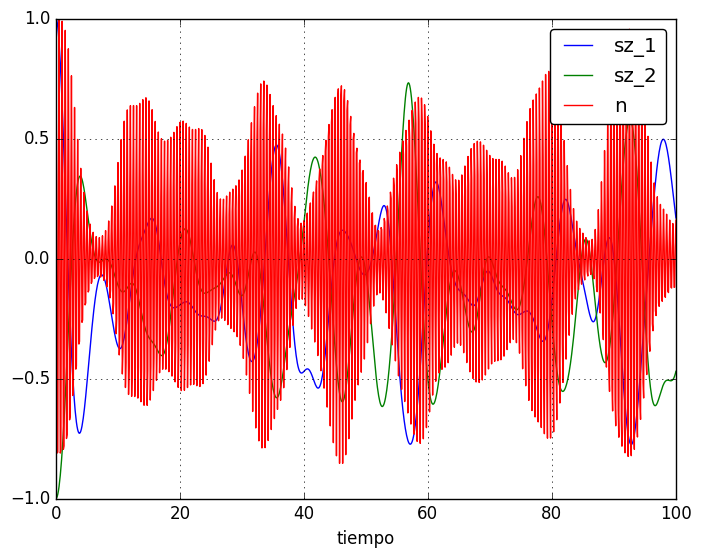

IJulia.##9#15)() at ./task.jl:360
while loading In[4], in expression starting on line 9


PyObject <matplotlib.legend.Legend object at 0x7fc490c5a2b0>

In [4]:
# spinup y spindown

ψ_inicial_up_down = coherentstate(b_fock, 1) ⊗ (spinup(b_spin)) ⊗ (spindown(b_spin))

tout, ψ_evol_up_down = timeevolution.schroedinger(tiempo, ψ_inicial_up_down, H)

expec_sz_1_up_down = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_up_down)
expec_sz_2_up_down = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_up_down)
expec_n_up_down = expect(a'*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_up_down)

plot(tiempo, expec_sz_1_up_down, label = "sz_1")
plot(tiempo, expec_sz_2_up_down, label = "sz_2")
plot(tiempo, expec_n_up_down, label = "n")

xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

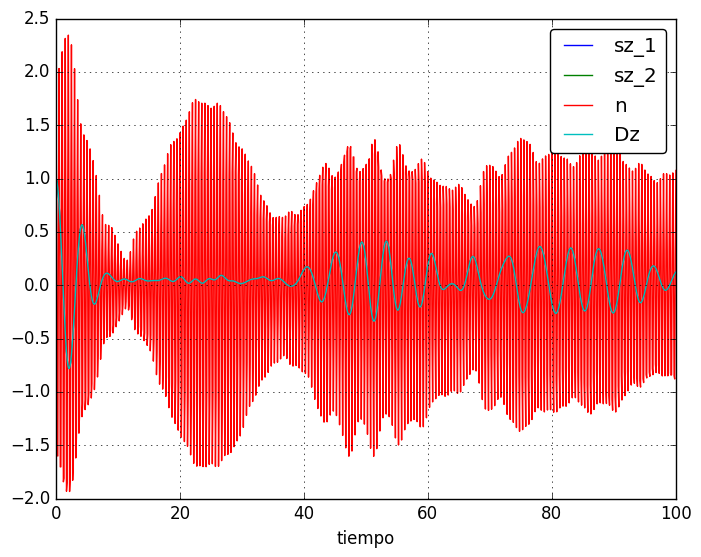

PyObject <matplotlib.legend.Legend object at 0x7fc48a4acef0>

In [13]:
# spinup y spinup. Éste es el que usan en el paper. 

ψ_inicial_up_up = coherentstate(b_fock, 2) ⊗ (spinup(b_spin)) ⊗ (spinup(b_spin))

tout, ψ_evol_up_up = timeevolution.schroedinger(tiempo, ψ_inicial_up_up, H)

expec_sz_1_up_up = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_up_up)
expec_sz_2_up_up = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_up_up)
expec_n_up_up = expect(a'*a/2 ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_up_up)
expec_dz_up_up = expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_up_up)

plot(tiempo, expec_sz_1_up_up, label = "sz_1")
plot(tiempo, expec_sz_2_up_up, label = "sz_2")
plot(tiempo, expec_n_up_up, label = "n")
plot(tiempo, expec_dz_up_up, label = "Dz")

xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

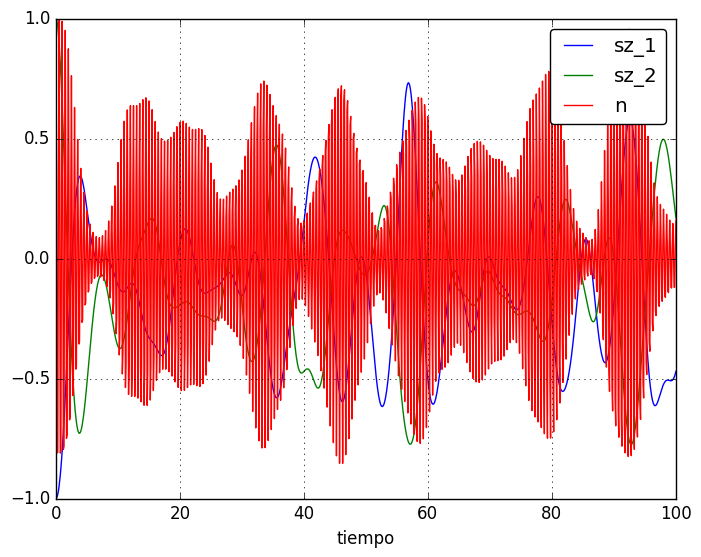

PyObject <matplotlib.legend.Legend object at 0x7fc490a29c50>

In [6]:
# spindown y spinup

ψ_inicial_down_up = coherentstate(b_fock, 1) ⊗ (spindown(b_spin)) ⊗ (spinup(b_spin))

tout, ψ_evol_down_up = timeevolution.schroedinger(tiempo, ψ_inicial_down_up, H)

expec_sz_1_down_up = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_down_up)
expec_sz_2_down_up = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_down_up)
expec_n_down_up = expect(a'*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_down_up)


plot(tiempo, expec_sz_1_down_up, label = "sz_1")
plot(tiempo, expec_sz_2_down_up, label = "sz_2")
plot(tiempo, expec_n_down_up, label = "n")

xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

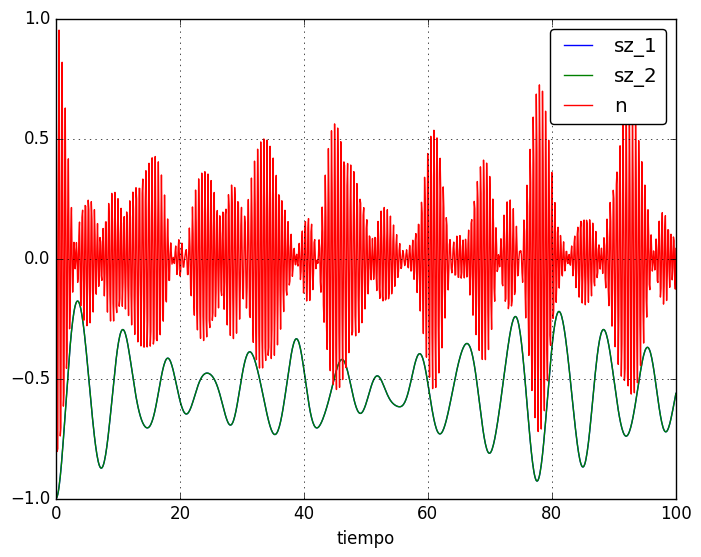

PyObject <matplotlib.legend.Legend object at 0x7fc4909be518>

In [7]:
# spindown y spindown

ψ_inicial_down_down = coherentstate(b_fock, 1) ⊗ (spindown(b_spin)) ⊗ (spindown(b_spin))

tout, ψ_evol_down_down = timeevolution.schroedinger(tiempo, ψ_inicial_down_down, H)

expec_sz_1_down_down = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_down_down)
expec_sz_2_down_down = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_down_down)
expec_n_down_down = expect(a'*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_down_down)


plot(tiempo, expec_sz_1_down_down, label = "sz_1")
plot(tiempo, expec_sz_2_down_down, label = "sz_2")
plot(tiempo, expec_n_down_down, label = "n")

xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

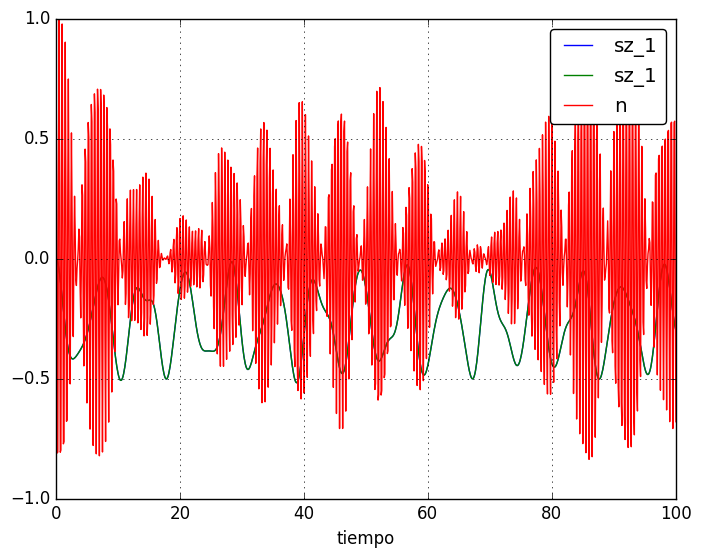

PyObject <matplotlib.legend.Legend object at 0x7fc490679e48>

In [8]:
ψ_inicial_combinacion = (1/(sqrt(2)))*(ψ_inicial_up_down + ψ_inicial_down_up)

tout, ψ_evol_combinacion = timeevolution.schroedinger(tiempo, ψ_inicial_combinacion, H)

expec_sz_1_combinacion = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_combinacion)
expec_sz_2_combinacion = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_combinacion)
expec_n_combinacion = expect(a'*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_combinacion)


plot(tiempo, expec_sz_1_combinacion, label = "sz_1")
plot(tiempo, expec_sz_2_combinacion, label = "sz_1")
plot(tiempo, expec_n_combinacion, label = "n")

xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

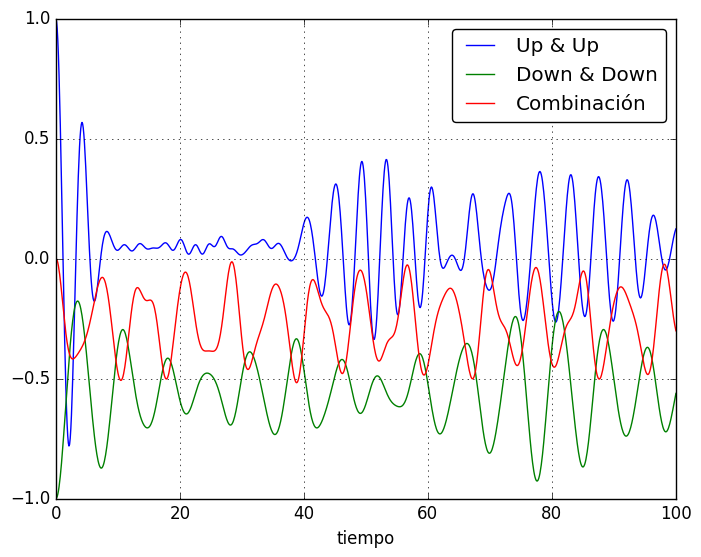

PyObject <matplotlib.legend.Legend object at 0x7fc48a64b7f0>

In [9]:
expec_up_up = (expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_up_up))
expec_down_down = (expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_down_down))
expec_combinacion = (expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_combinacion))

plot(tiempo, expec_up_up, label = "Up & Up")
plot(tiempo, expec_down_down, label = "Down & Down")
plot(tiempo, expec_combinacion, label = "Combinación")

xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

In [10]:
Ham = H_1 + H_2 + H_3

ψ_0 = coherentstate(b_fock, 2) ⊗ (spinup(b_spin)) ⊗ (spinup(b_spin))

tout, ψ_ev = timeevolution.schroedinger(tiempo, ψ_0, Ham)


([0.0,0.1001,0.2002,0.3003,0.4004,0.500501,0.600601,0.700701,0.800801,0.900901  …  99.0991,99.1992,99.2993,99.3994,99.4995,99.5996,99.6997,99.7998,99.8999,100.0],QuantumOptics.states.Ket[QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([11,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([11],0,10),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.135335+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.270671+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.382786+0.0im,0.0+0.0im  …  0.0+0.0im,0.0+0.0im,0.115027+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0727494+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im]),QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([11,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([11],0,10),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.10933-0.0795382im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0831533-0.257019im,-0.00250127-0.00343815im,-0.00250127-0.0034381

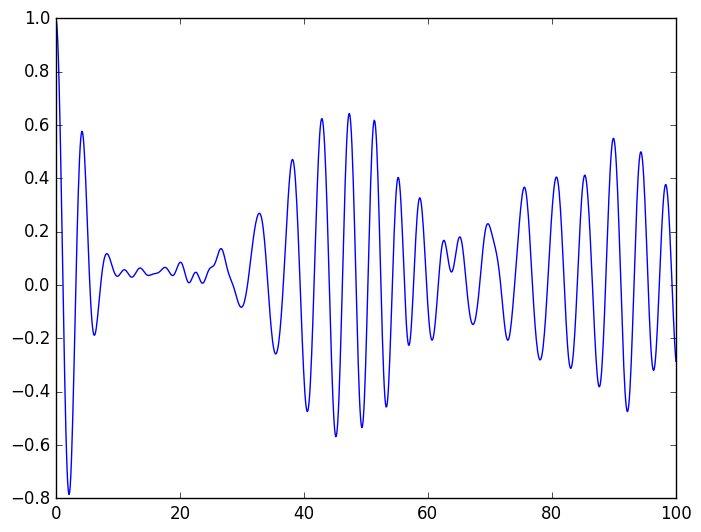

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc48a5b86a0>

In [11]:
exp = expect(identityoperator(b_fock) ⊗ sz_1, ψ_ev)
plot(tiempo, exp)

In [66]:
g_coupling = [2*π*i for i in linspace(0,1,100)]  

Hint_coupling = [g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2) for g in g_coupling]

H_coupling = [H_1 + H_2 + H_4 + H_field_atom for H_field_atom in Hint_coupling]

H_ground = [groundstate(H_coupling[i]) for i in 1:length(H_coupling)]

H_ground_2 = [groundstate(H_1 + H_2 + H_4 + g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2)) for g in g_coupling]

100-element Array{QuantumOptics.states.Ket,1}:
 QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([11,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([11],0,10),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[5.99588e-17-9.17549e-17im,-2.64666e-16-2.58042e-16im,5.27062e-17-3.25291e-16im,0.463959-0.885856im,-5.49974e-17-1.31985e-17im,-1.30707e-16+1.68304e-16im,2.19717e-17+1.475e-16im,-3.90524e-16-1.64475e-16im,-3.11067e-17+1.31915e-17im,5.29477e-17-3.64135e-18im  …  -3.39572e-17-2.6703e-17im,1.26977e-17-1.92485e-17im,5.8687e-17+1.32264e-17im,3.1239e-17-6.72339e-17im,3.60884e-17-4.11306e-17im,-2.13733e-18-5.79937e-18im,1.39934e-16-1.472e-16im,-2.57482e-19-2.35953e-18im,4.92067e-17-1.66155e-17im,-5.73374e-17+2.41528e-17im])          
 QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([11,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([11],0,10),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics

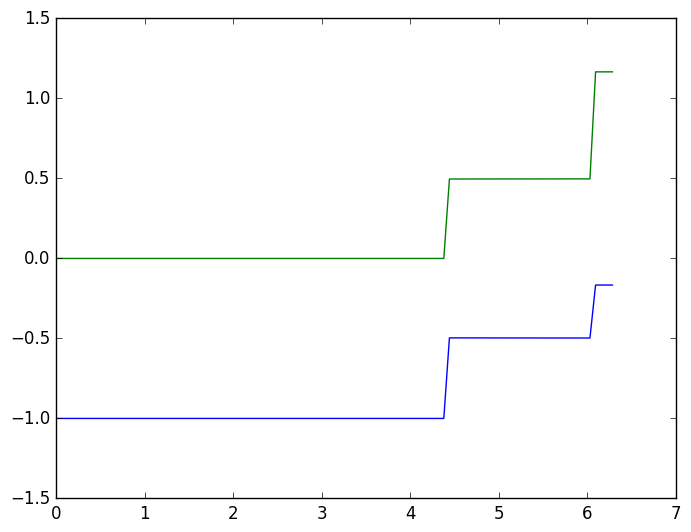

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc487580128>

In [67]:
kkk = []
lll = []
for i in 1:length(H_ground_2)
    push!(kkk, expect(identityoperator(b_fock) ⊗ Dz, H_ground_2[i]))
    push!(lll, expect(at*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), H_ground_2[i]))
end
return kkk

plot(g_coupling, kkk)
plot(g_coupling, lll)